In [12]:
import matplotlib
matplotlib.use('TkAgg')
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from math import ceil
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy 

import pylab
import pandas as pd
import numpy as np

In [3]:
import ClusteringAnalysis

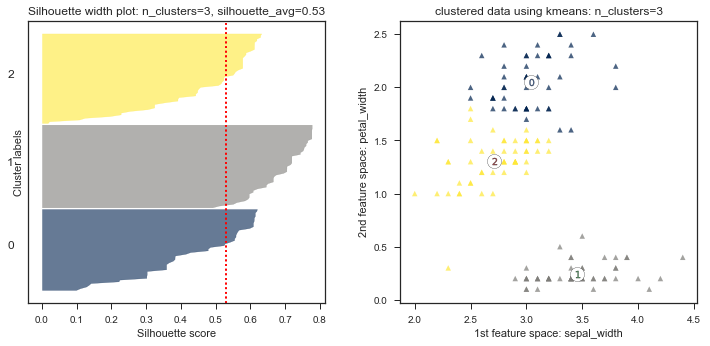

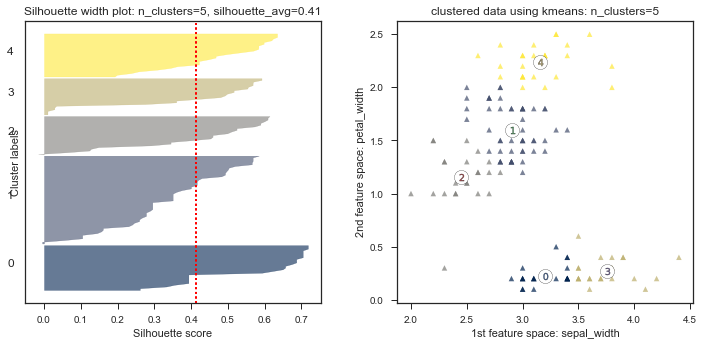

In [4]:
ca = ClusteringAnalysis.ClusteringAnalysis()
data,_ = ca.load_data_iris()
feature_pair = ['sepal_width','petal_width']
data = data[feature_pair]
fitres = ca.model_kmeans(data,n_clusters=3)
fig = ca.plot_silhouette_width(fitres)
fit_res = ca.model_kmeans(data,n_clusters=5)
fig = ca.plot_silhouette_width(fit_res)


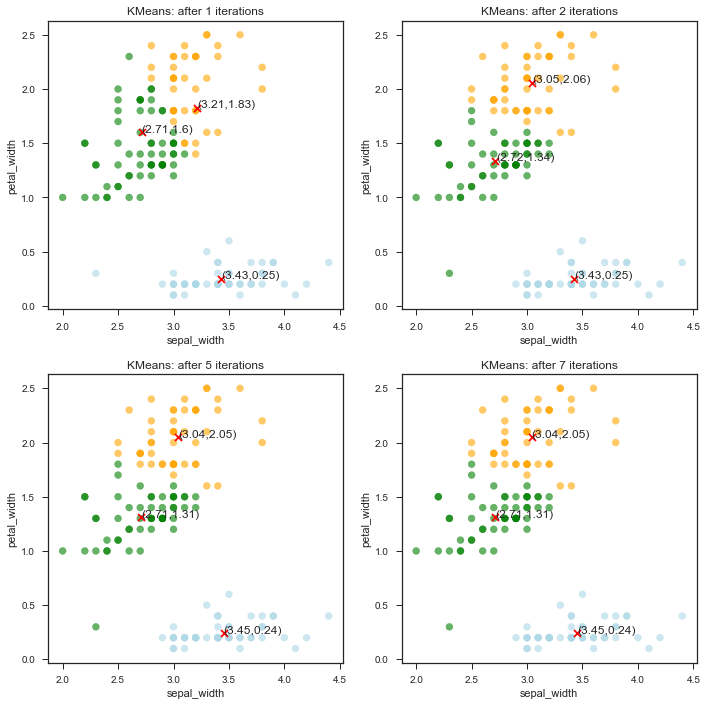

In [5]:
fig_iter = ca.plot_scatter_kmeans(data,n_clusters=3,paramtype='n_iteration',
                                  params=[1,2,5,10],feature_pair=feature_pair)

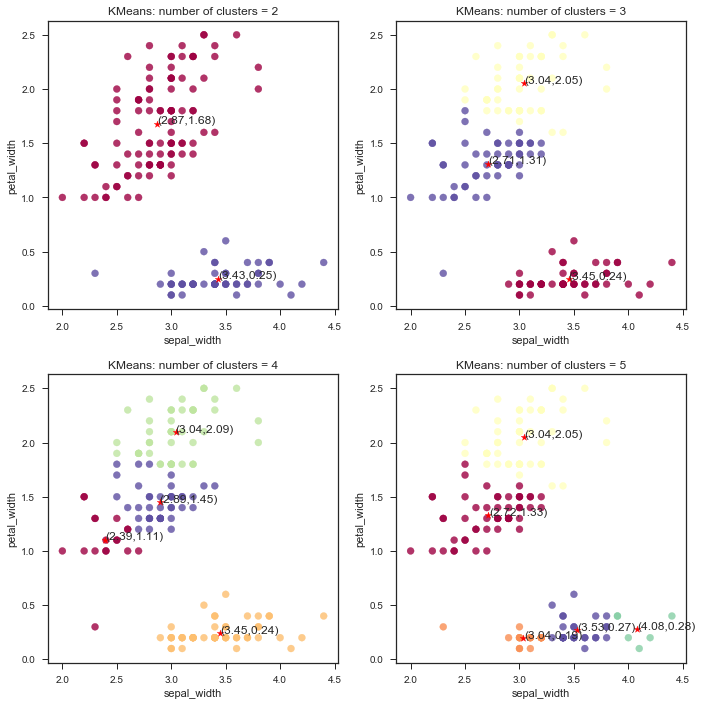

In [6]:
fig_ncls = ca.plot_scatter_kmeans(data,paramtype='n_clusters',
                                  params=[2,3,4,5],feature_pair=feature_pair)


/Users/xindong/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


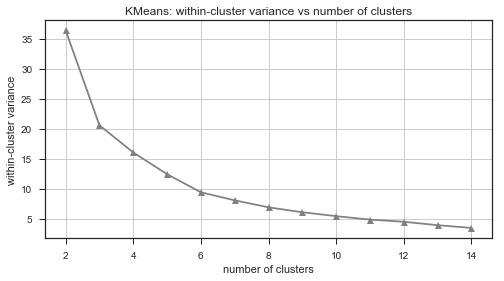

In [8]:
sa = []
wcvs = []
n_clusters_range = np.arange(2,15)
for n_clusters in n_clusters_range:
    fitres = ca.model_kmeans(data,n_clusters=n_clusters)
    sw = ca.metric_silhouette_width(fitres['data'],fitres['cluster_labels'])
    wcv = fitres['model'].inertia_
    sa.append(sw['silhouette_avg'])
    wcvs.append([n_clusters,wcv])
  
sa = pd.DataFrame(sa,columns=['silhouette_avg'])
wcvs = pd.DataFrame(wcvs,columns=['n_clusters','wcv'])
sa['n_clusters'] = n_clusters_range

fig,ax=plt.subplots(figsize=(8,4))
ax.plot(wcvs['n_clusters'],wcvs['wcv'],marker='^',c='grey')
ax.set_title('KMeans: within-cluster variance vs number of clusters')
ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster variance')
ax.grid(True)


## Agglomerative_clustering

In [10]:
def load_data(dataset='iris',features = None,true_label_name = None):
    if dataset == 'iris':
        data = sns.load_dataset("iris")   
        X = data.loc[:,features] if features else data
        true_labels = data.loc[:,true_label_name] if true_label_name in data.columns else []
    return X,true_labels

def agglomerative_clustering(X,linkage,n_clusters):
    model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
    model.fit(X)
    xcluster = X.rename(columns = {col:'feature_{}'.format(col) for col in X.columns})
    xcluster.loc[:,'cluster_label'] = model.labels_
    xcluster.loc[:,'cluster_method'] = 'agglomerative_{}'.format(linkage)
    return xcluster,model

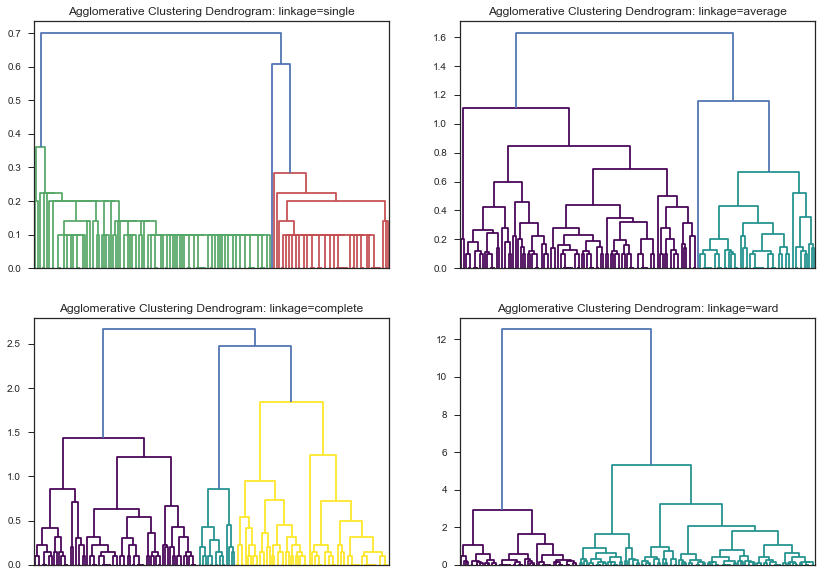

In [13]:
features = ['sepal_width','petal_width']
X,_ = load_data(features = features)
linkages = ['single','average','complete','ward']
max_d = None
cmap = plt.cm.viridis(np.linspace(0, 1, 3))
[h_col,h_row] = [7,5]
ncols = 2
nrows = ceil(len(linkages)/ncols)
fig,axes = plt.subplots(ncols=ncols, nrows = nrows, figsize=(h_col*ncols,h_row*nrows))
for (ax, linkages) in zip(axes.flatten(),linkages):
    hierarchy.dendrogram(Z=hierarchy.linkage(X, linkage),ax=ax)
    hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
    if max_d:
      ax.axhline(y=max_d, c='r',ls=':')
    ax.set_xticklabels('')
    ax.set_title('Agglomerative Clustering Dendrogram: linkage={}'.format(linkage))
    

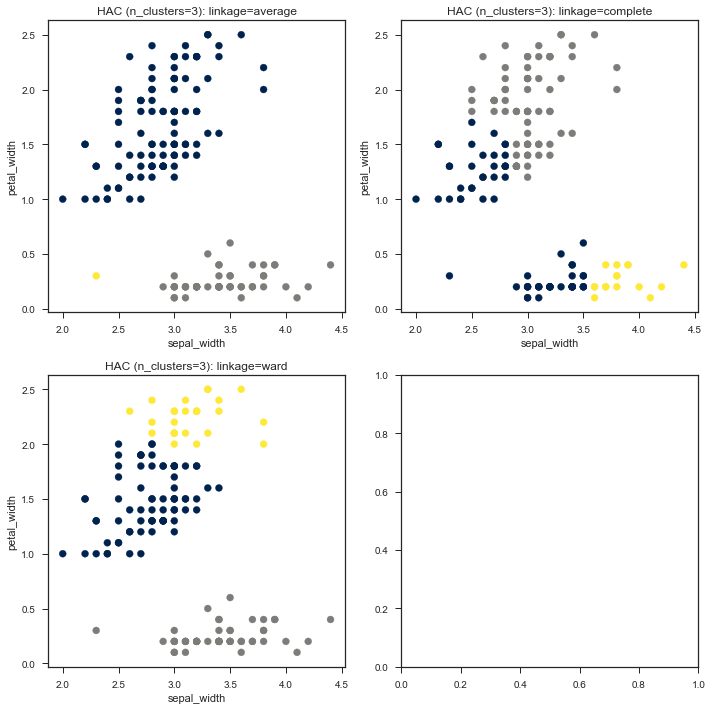

In [15]:
features = ['sepal_width','petal_width']
linkages = ['single','average','complete','ward']
linkages = ['average','complete','ward']

X,_ = load_data(features = features)
n_clusters = 3

[h_col,h_row] = [5,5]
ncols = 2
nrows = ceil(len(linkages)/ncols)
fig,axes = plt.subplots(ncols=ncols, nrows = nrows, sharey=False,figsize=(h_col*ncols,h_row*nrows))
for (ax, linkage) in zip(axes.flatten(),linkages):
    xcluster,model = agglomerative_clustering(X,linkage,n_clusters)
    ax.scatter(X.loc[:, features[0]], X.loc[:, features[1]], c=model.labels_,cmap=plt.cm.cividis)
    ax.set_title('HAC (n_clusters={}): linkage={}'.format(n_clusters,linkage)) 
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
fig.tight_layout()